In [7]:
import tifffile as tiff
import pathlib
import matplotlib.pyplot as plt
import numpy.random as rnd
import numpy as np

In [2]:
# iterate through all images in all subfolders
# and create a single dataset of 512x512 images

# path to the dataset
dataset_path = pathlib.Path('/5S-app/data/general_data')
# path to the output dataset directory
output_path = pathlib.Path('/5S-app/data/patches_512x512')

# create output directory if it does not exist
output_path.mkdir(parents=True, exist_ok=True)

In [5]:
def create_dataset(input_path:pathlib.Path, output_path:pathlib.Path):
    for sub_path in input_path.iterdir():
        if sub_path.is_dir():
            create_dataset(sub_path, output_path)
        if sub_path.is_file() and sub_path.suffix in ['.tif', '.tiff']:
            # load image
            img = tiff.imread(sub_path)
            # get image name
            img_name = sub_path.stem
            # get image shape
            img_shape = img.shape
            # get image size
            img_size = img_shape[0]
            # get number of patches
            n_patches = img_size // 512
            # iterate through all patches
            for i in range(n_patches):
                for j in range(n_patches):
                    # get patch
                    patch = img[i*512:(i+1)*512, j*512:(j+1)*512]
                    # get patch name
                    patch_name = img_name + '_' + str(i) + '_' + str(j) + '.tif'
                    # save patch
                    tiff.imwrite(pathlib.Path.joinpath(output_path, patch_name), patch)

create_dataset(dataset_path, output_path)

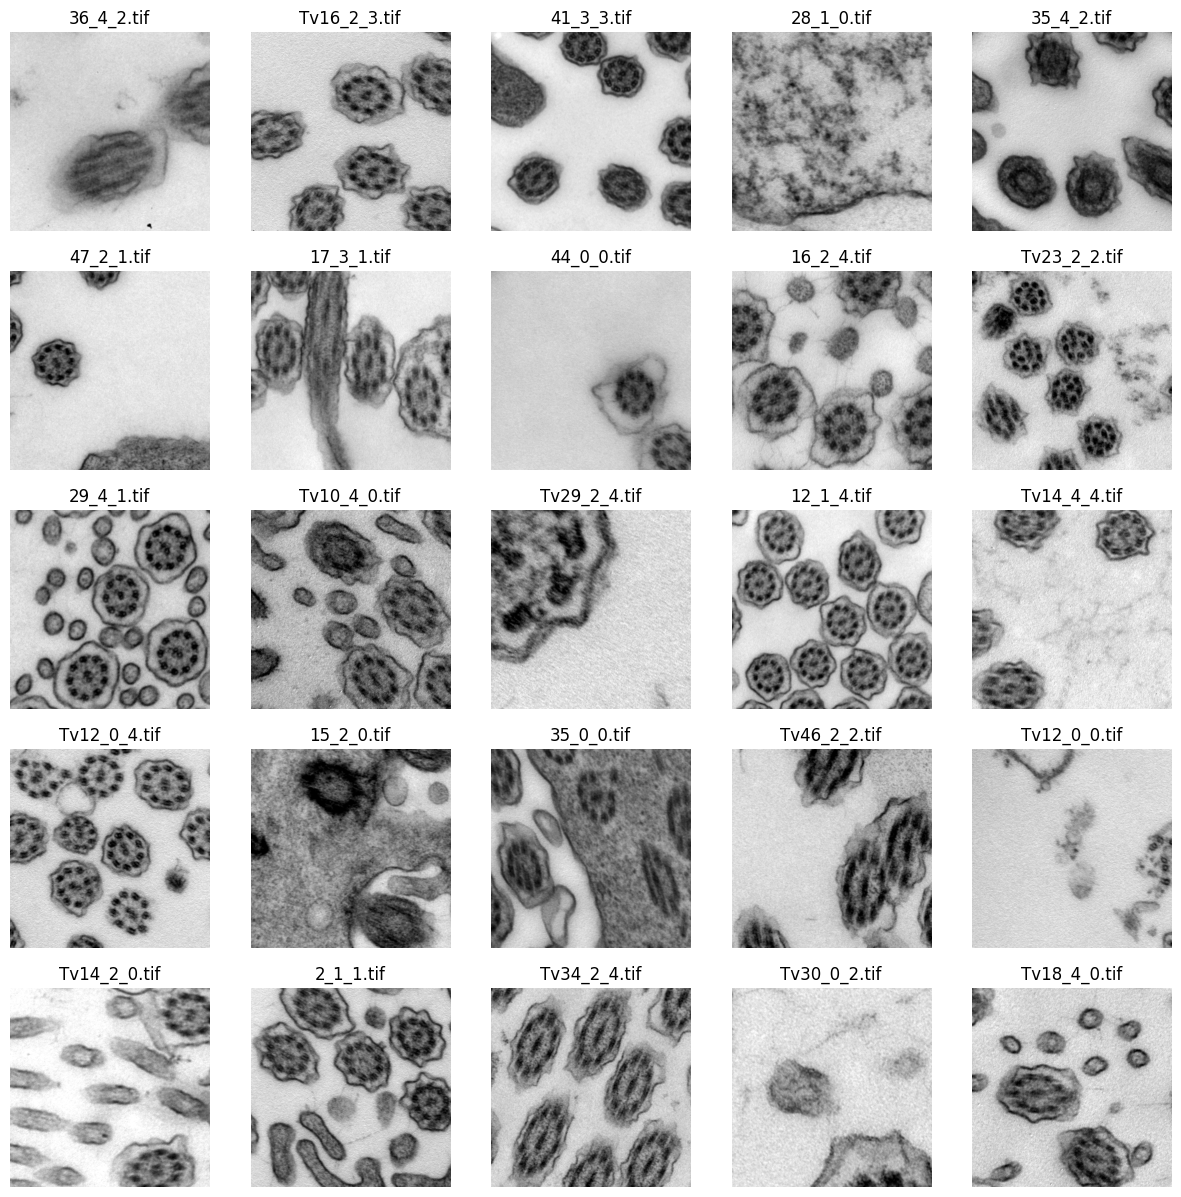

In [12]:
# visualize 25 random samples from generated dataset
generated_samples = output_path.iterdir()

# get 25 random samples
samples = rnd.choice(list(generated_samples), 25)

fig, ax = plt.subplots(5, 5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        img = tiff.imread(samples[i*5+j])
        ax[i, j].imshow(img, cmap='gray')
        ax[i, j].set_title(samples[i*5+j].name)
        ax[i, j].axis('off')
plt.show()
plt.close()

In [ ]:
# set seed and split to train and validation
seed = 42
np.random.seed(seed)

all_images = list(output_path.glob('*.tif'))
train_indices = np.random.choice(len(all_images), size=int(len(all_images)*0.7), replace=False)
validation_indices = np.setdiff1d(np.arange(len(all_images)), train_indices)

for file_idx in train_indices:
    pathlib.Path(all_images[file_idx]).rename(all_images[file_idx].parent / 'train' / all_images[file_idx].name)

for file_idx in validation_indices:
    pathlib.Path(all_images[file_idx]).rename(all_images[file_idx].parent / 'valid' / all_images[file_idx].name)